In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [2]:
# read the csv file
df = pd.read_csv('A2_data.csv')

# unique classes
print(df['class'].unique())

# drop the class column -- its for the dimensionality reduction
df = df.drop('class', axis=1)

# drop the id column -- its for the dimensionality reduction
df = df.drop('field_ID', axis=1)




['GALAXY' 'QSO' 'STAR']


In [3]:
# count the number of unique values in each column

for col in df.columns:
    print(col, df[col].nunique())



alpha 99997
delta 99999
u 93748
g 92651
r 91901
i 92019
z 92007
MJD 2180
redshift 14815
plate 6284


# k-nearest neighbor

In [18]:
# apply k-nearest neighbor algorithm in the original dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# read the csv file
df_knn = pd.read_csv('A2_data.csv')

# drop the id column
df_knn = df_knn.drop('field_ID', axis=1)

# transform classes to numbers
df_knn['class'] = df_knn['class'].map({'GALAXY': 1, 'QSO': 2, 'STAR': 3})

df_x = df_knn.iloc[:, 0:10]
df_y = df_knn['class']

kfold=KFold(n_splits=5, shuffle=True, random_state=42)

# create the model
knn = KNeighborsClassifier(n_neighbors=1000, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

# fit the model
knn.fit(df_x, df_y)

# predict the response
pred = knn.predict(df_x)

# evaluate accuracy
print(accuracy_score(df_y, pred))

# cross validation
scores = cross_val_score(knn, df_x, df_y, cv=kfold)

print('Cross-validation scores:\n{}'.format(scores))
print('Average cross-validation score:{:.4f}'.format(scores.mean()))




# split the data into train and test
#X_train, X_test, y_train, y_test = train_test_split(df_knn, df_knn['class'], test_size=0.2, random_state=42)



0.59445
Cross-validation scores:
[0.593   0.59365 0.598   0.59585 0.59175]
Average cross-validation score:0.5944


# knn - hyperparameter tuning

In [21]:
# hyperparameter tuning

# create new a knn model
knn2 = KNeighborsClassifier()

# create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100), 
'weights': ['uniform', 'distance'], 
'algorithm': ['auto', 'ball_tree', 
'kd_tree', 'brute'], 'leaf_size': np.arange(1, 100), 'p': [1, 2], 
'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis', 'haversine', 'hamming', 'canberra', 'braycurtis', 'jaccard', 'dice', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath']}

# use gridsearch to test all values for n_neighbors
from sklearn.model_selection import GridSearchCV
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

# fit model to data
knn_gscv.fit(df_x, df_y)

# check top performing n_neighbors value
print(knn_gscv.best_params_)
print(knn_gscv.best_score_)
print(knn_gscv.cv_results_['mean_test_score'][knn_gscv.best_index_])


# check mean score for the top performing value of n_neighbors
print(knn_gscv.best_score_)
print(knn_gscv.cv_results_['mean_test_score'][knn_gscv.best_index_])


# PCA

In [25]:
# apply PCA

#pca = PCA(n_components=2)

#pca.fit(df)
#transformed = pca.transform(df)

# pca with standard scaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df)



pca = PCA(n_components=2)
pca.fit(scaled)
transformed_scaled = pca.transform(scaled)



In [26]:
transformed_pca = pd.DataFrame(transformed_scaled, columns=['PC1', 'PC2'])
transformed_pca

,PC1,PC2
0,-0.119857,0.326479
1,-0.406249,1.942203
2,-0.171612,0.479323
3,-0.236708,1.240552
4,0.472838,-2.438516
...,...,...
99995,-0.281239,1.695289
99996,-0.129921,0.589206
99997,0.215649,-1.125475
99998,-0.099650,0.074782


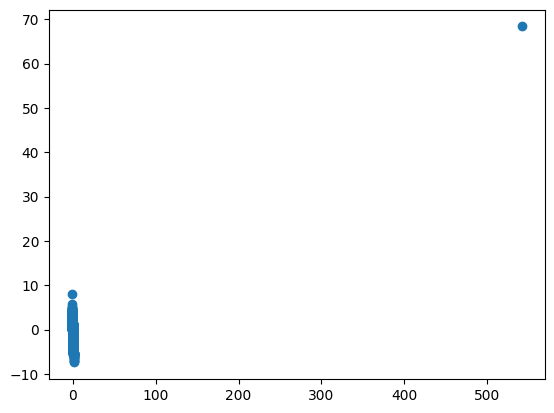

In [27]:
# plot the data

plt.scatter(transformed_scaled[:,0], transformed_scaled[:,1])
plt.show()

# t-SNE

In [15]:
# apply t-SNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50)
transformed = tsne.fit_transform(df)

c:\Users\Maximos Bilalis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Maximos Bilalis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [16]:
transformed_TSNE = pd.DataFrame(transformed, columns=['TSNE1', 'TSNE2'])
transformed_TSNE

,TSNE1,TSNE2
0,7.950809,-3.502136
1,15.644241,7.048032
2,-23.357866,0.426284
3,-11.006954,-33.521927
4,-44.917286,16.707378
...,...,...
99995,37.850433,1.981993
99996,-19.793312,-28.782019
99997,33.563721,41.506420
99998,2.524868,-50.073841


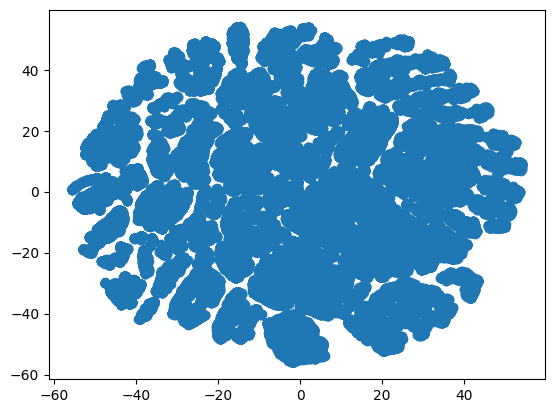

In [17]:
# plot the data -- no classes yet

plt.scatter(transformed[:,0], transformed[:,1])  #, c=df['class'])
plt.show()


# UMAP

In [18]:

# Apply UMAP

import umap

umap = umap.UMAP(n_components=2)
transformed = umap.fit_transform(df)


c:\Users\Maximos Bilalis\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
transformed_UMAP = pd.DataFrame(transformed, columns=['UMAP1', 'UMAP2'])
transformed_UMAP

,UMAP1,UMAP2
0,-2.966691,1.383586
1,4.021680,11.233171
2,10.824118,7.333644
3,-0.115641,17.531996
4,22.834642,1.403315
...,...,...
99995,7.895065,3.739915
99996,13.788928,12.287697
99997,8.277445,-7.788459
99998,12.178983,15.016600


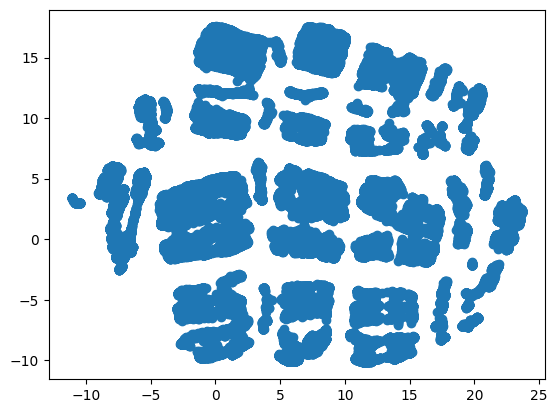

In [20]:
# plot the data -- no classes yet

plt.scatter(transformed[:,0], transformed[:,1]) #, c=df['class'])
plt.show()
